<a href="https://colab.research.google.com/github/Axis121/AMLS_Project/blob/main/Face_Shape_2_0_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://towardsdatascience.com/basic-smile-detection-using-opencv-and-dlib-aeb22afb9e67


In [2]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
#https://stackoverflow.com/questions/3426108/how-to-sort-a-list-of-strings-numerically
from natsort import natsorted # pip install natsort
import os
from os import listdir
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
def faceLandmarks(im):

    # Path for the detection model, you can download it from here: https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat
    PREDICTOR_PATH = r"/content/drive/MyDrive/Colab Notebooks/Test_folder/shape_predictor_68_face_landmarks.dat"
    
    # Create object to detect the face
    faceDetector = dlib.get_frontal_face_detector()

    # Create object to detect the facial landmarks
    landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

    # Detect faces
    faceRects = faceDetector(im, 0)

    # Initialize landmarksAll array
    landmarksAll = []

    # For each face detected in the image, this chunk of code creates a ROI around the face and pass it as an argument to the 
    # facial landmark detector and append the result to the array landmarks 
    for i in range(0, len(faceRects)):
        newRect = dlib.rectangle(int(faceRects[i].left()),
                            int(faceRects[i].top()),
                            int(faceRects[i].right()),
                            int(faceRects[i].bottom()))
        landmarks = landmarkDetector(im, newRect)
        landmarksAll.append(landmarks)

    return landmarksAll, faceRects


In [4]:
def renderFacialLandmarks(im, landmarks):
    
    # Convert landmarks into iteratable array
    points = []
    [points.append((p.x, p.y)) for p in landmarks.parts()]

    # Loop through array and draw a circle for each landmark
    for p in points:
        cv2.circle(im, (int(p[0]),int(p[1])), 2, (255,0,0),-1)

    # Return image with facial landmarks 
    return im

Extractions of features

In [5]:
def extractFeatures(folder_dir): 
    number_of_features = 136 #68 coordinates, x and y points
    features = np.ones((1,number_of_features))*10
    current_features = np.zeros((1,number_of_features))

    for images in natsorted(os.listdir(folder_dir)):
    
        # check if the image ends with png
        if (images.endswith(".png")):
            
            print(images) # for testing
            #type(images)
            ##use images to finish the directory call for im
            ## Read an image to a variable
            im = cv2.imread(folder_dir +"/" + images)
            
            # Get landmarks using the function created above
            landmarks, _ = faceLandmarks(im)

            if len(landmarks) == 0: #set features to 0
                for j in range(68):
                  current_features [0,j]=0
                  current_features [0,j+68]=0

            else:
                # Render the landmarks on the first face detected. You can specify the face by passing the desired index to the landmarks array.
                # In this case, one face was detected, so I'm passing landmarks[0] as the argument.
                faceWithLandmarks = renderFacialLandmarks(im, landmarks[0])
                for j in range(68):
                  #print(j)
                  current_features [0,j]=landmarks[0].parts()[0].x-landmarks[0].parts()[j].x
                  current_features [0,j+68]=landmarks[0].parts()[0].y-landmarks[0].parts()[j].y
        features = np.vstack((features,current_features))
    
    features = np.delete(features,0,axis = 0)
    return features
    print("done")
            

In [46]:
def getLabel(label_dir,column):
  df = pd.read_csv(label_dir)
  #df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_folder/dataset/labels_modified.csv')
  #df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/celeba/labels_modified.csv')
  #print(df.iloc[:,3].values)


  # replace() syntax
  df = df.replace(-1,0)
  labels = df.iloc[:,column].values #face shape is the 3rd coloumn, eye colour is the 2nd
  labels = np.transpose(labels)

  return labels

In [8]:
def removeMissingValues (features, labels):

  featuresAndLabels = np.column_stack((features,labels)) # combine the features and labels into one matrix, horizontally
  featuresAndLabels = featuresAndLabels[~np.all(featuresAndLabels[:,:136] == 0, axis=1)] #remove rows if the feature row section is full of zeroes
  clean_features = featuresAndLabels [:,:136] # remake feature matrix
  clean_labels = featuresAndLabels [:,136] # remake label vector

  return clean_features, clean_labels

In [ ]:
folder_dir = "/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/cartoon_set/img" # training set
#folder_dir = "/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/dataset_AMLS_22-23_test/cartoon_set_test/img" # test set

features = extractFeatures(folder_dir)
#np.savetxt("real_cartoon_features.csv",features)
#np.save("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/feature_backup_2.npy",features)
np.savetxt("real_cartoon_features_test_set.csv",features)
np.save("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/cartoon_feature_test_set.npy",features)

0.png
1.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png
97.png
98.png
99.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.png
130.png
131.png
132.png
133.png
134.png
135.png
136.png
137.png
138.pn

Loading saved features and importing labels

In [9]:
features = np.load("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/feature_backup_2.npy")

In [47]:
label_dir = '/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/cartoon_set/labels_modified.csv' # training set labels
#label_dir = '/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/dataset_AMLS_22-23_test/cartoon_set_test/modified_labels.csv' # test set labels

labels = getLabel(label_dir,column = 2) # get label vector

In [48]:
print(labels)

[4 4 3 ... 2 2 2]


Removing miss value rows from dataset

In [28]:
clean_features, clean_labels = removeMissingValues (features, labels)

In [19]:
print(np.shape(clean_labels))

(7984,)


Graph features and lables // only works for bianry classification. Think of how to adapt or remove

In [ ]:
# Scatterplot - Color Change
x = np.random.randn(50)
y1 = np.random.randn(50)
y2= np.random.randn(50)

# Plot
plt.scatter(x,y1,color='blue')
plt.scatter(x,y2,color= 'red')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Decorate
plt.title('Color Change')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

<ipython-input-22-d8bb6003fdd7>:3: RuntimeWarning: invalid value encountered in true_divide
  feature_norm = clean_features / clean_features.max(axis=0)


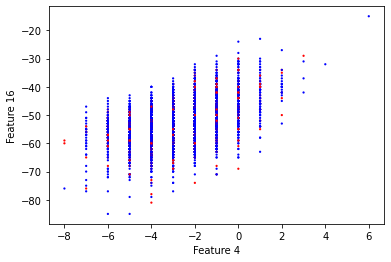

In [22]:
col = np.where(clean_labels>0,'b','r')

feature_norm = clean_features / clean_features.max(axis=0)

plt.scatter(clean_features[:,1], clean_features[:,6], c=col, s=5, linewidth=0)
plt.xlabel("Feature 4")
plt.ylabel("Feature 16")
plt.show()

Feature selection using select k best and chi test

In [29]:
from sklearn.feature_selection import SelectKBest, chi2

selected_features = SelectKBest(chi2, k=30).fit_transform(abs(clean_features), clean_labels) # choose 30 best features based on chi test, no guideline found for rbf svm but 30 is max for linear svm
#X_new.shape

Obtain training and validation sets from feature selected dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(selected_features, clean_labels, test_size=0.3,random_state=109) # 70% training and 30% test

Obtain test set from separate directory of images

In [ ]:
##make a check to see if load file exists then reload, if it does not exist then extract.

In [ ]:
## Extract Features
folder_dir = "/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/dataset_AMLS_22-23_test/cartoon_set_test/img" # test set
features = extractFeatures(folder_dir)
np.save("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/cartoon_feature_test_set.npy",features) # saving features to a file

In [ ]:
## reload features from saved file and get labels
features_test = np.load("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/cartoon_feature_test_set.npy")

## labels
label_dir = '/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/dataset_AMLS_22-23_test/cartoon_set_test/modified_labels.csv' # test set labels
labels_test = getLabel(label_dir) # get label vector

Process Data

In [57]:
## remove missing values
clean_features_test, clean_labels_test = removeMissingValues (features_test, labels_test)

## select 30 best features
# choose 30 best features based on chi test, no guideline found for rbf svm but 30 is max for linear svm
selected_features_test = SelectKBest(chi2, k=30).fit_transform(abs(clean_features), clean_labels) 

## Match naming convention
X_test = selected_features_test
Y_test = clean_labels_test

Training and Validation of models

In [53]:
#logistic regression model
logr_model = LogisticRegression(max_iter = 2000).fit(X_train, Y_train)
preds = logr_model.predict(X_validate)
print(metrics.classification_report(preds, Y_validate))
metrics.confusion_matrix(Y_validate,preds)

              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63       593
         1.0       0.29      0.47      0.36       278
         2.0       0.54      0.48      0.51       571
         3.0       0.38      0.43      0.40       438
         4.0       0.64      0.55      0.59       516

    accuracy                           0.51      2396
   macro avg       0.51      0.50      0.50      2396
weighted avg       0.54      0.51      0.52      2396



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[340,  40,  41,  18,  44],
       [101, 130,  57, 111,  53],
       [ 38,  22, 276, 102,  70],
       [ 57,  57, 136, 190,  63],
       [ 57,  29,  61,  17, 286]])

In [56]:
## Tuning hyper parameters of svm rbf model using validation set
from sklearn.model_selection import GridSearchCV

# normalise validation features data
#X_test_normalised = X_validate / X_validate.max(axis=0)

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.220 total time=   4.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.219 total time=   3.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.219 total time=   3.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.219 total time=   3.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.219 total time=   3.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.220 total time=   3.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   3.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   3.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   3.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.219 total time=   4.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.259 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [59]:
## Validation
grid_predictions = grid.predict(X_validate)

# print classification report
print(metrics.classification_report(Y_validate, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       483
         1.0       0.64      0.56      0.60       452
         2.0       0.65      0.69      0.67       508
         3.0       0.63      0.58      0.60       503
         4.0       0.66      0.70      0.68       450

    accuracy                           0.65      2396
   macro avg       0.65      0.65      0.65      2396
weighted avg       0.65      0.65      0.65      2396



In [60]:
## training tuned model based on training set
## features are max normalised
from sklearn import svm
#feaature should be normalised first
X_validate_normalised = X_validate / X_validate.max(axis=0)
X_train_normalised = X_train / X_train.max(axis=0)

#Create a svm Classifier
rbf_svm_model = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=100, gamma=0.0001) #

#Train the model using the training sets
rbf_svm_model.fit(X_train, Y_train)

#Predict the response for validation dataset
y_pred = rbf_svm_model.predict(X_validate)

print(metrics.classification_report(y_pred, Y_validate))
metrics.confusion_matrix(Y_validate,y_pred)

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       515
         1.0       0.56      0.64      0.60       398
         2.0       0.69      0.65      0.67       542
         3.0       0.58      0.63      0.60       462
         4.0       0.70      0.66      0.68       479

    accuracy                           0.65      2396
   macro avg       0.65      0.65      0.65      2396
weighted avg       0.65      0.65      0.65      2396



array([[344,  44,  27,  21,  47],
       [ 69, 255,  29,  50,  49],
       [ 24,  25, 352,  80,  27],
       [ 29,  44,  97, 291,  42],
       [ 49,  30,  37,  20, 314]])

In [61]:
#Predict the response for test dataset
y_pred = rbf_svm_model.predict(X_test)

print(metrics.classification_report(y_pred, Y_test))
metrics.confusion_matrix(Y_test,y_pred)


              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      1670
         1.0       0.60      0.68      0.64      1311
         2.0       0.75      0.70      0.73      1867
         3.0       0.64      0.69      0.67      1545
         4.0       0.76      0.72      0.74      1591

    accuracy                           0.70      7984
   macro avg       0.70      0.70      0.69      7984
weighted avg       0.70      0.70      0.70      7984



array([[1147,  148,   90,   66,  128],
       [ 217,  891,   93,  164,  127],
       [  84,   90, 1306,  186,   68],
       [  82,  108,  287, 1067,  119],
       [ 140,   74,   91,   62, 1149]])

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

Save the model to be reloaded later

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'B1_svm_model.sav'
pickle.dump(rbf_svm_model, open(filename, 'wb'))

In [ ]:
# load the model from disk
filename = 'B1_svm_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
## Test loaded model
result = loaded_model.score(X_test, Y_test)
print(result)

Examination of Learning Curve

In [33]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

estimator = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=100, gamma=0.0001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, selected_features, clean_labels, cv = 5, return_times=True)

KeyboardInterrupt: ignored

<function matplotlib.pyplot.show(*args, **kw)>

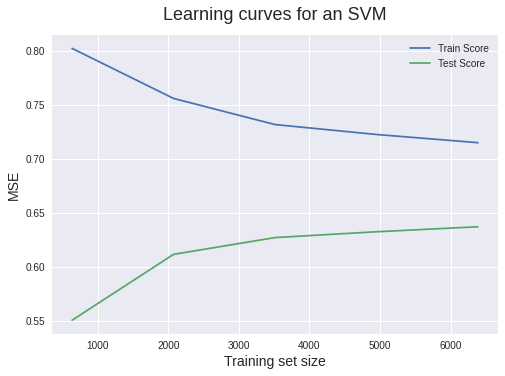

In [ ]:
## plotting learning curve
plt.style.use('seaborn')
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for an SVM', fontsize = 18, y = 1.03)
plt.legend(["Train Score", "Test Score"])
plt.show

In [ ]:
print(train_sizes)

[ 638 2075 3512 4949 6387]
